In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'
application_df = application_df.drop(['EIN', 'NAME','STATUS'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [4]:
# Number of unique values in each column.

application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df["APPLICATION_TYPE"].value_counts()
application_count


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = list(application_count.loc[application_count < 200].index)

application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [7]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df['CLASSIFICATION'].value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count[classification_count >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count.loc[classification_count < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Look at INCOME_AMT value counts for binning
income_count = application_df['INCOME_AMT'].value_counts()
income_count

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [12]:
temp = list(income_count.loc[income_count < 499999].index)

In [13]:
# Bin income with million value together
income_amt_to_replace = [i for i in  temp if "M" in i]
income_amt_to_replace

['1M-5M', '10M-50M', '5M-10M', '50M+']

In [14]:
# Replace in dataframe
for app in income_amt_to_replace:
    application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace(app,"1M+")

# Check to make sure binning was successful
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M+               1519
1-9999             728
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [15]:
# As is in SynapticBoost Example
# Determine which ASK_AMT data points are outside of the 1.5*IQR range
amounts = application_df['ASK_AMT'].sort_values()
quartiles = np.quantile(amounts,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [print(j) if j < lower_bound or j > upper_bound else next for j in amounts]

11886
11899
11901
11912
11917
11918
11935
11975
11983
12026
12049
12084
12089
12096
12097
12116
12127
12135
12140
12173
12174
12178
12184
12194
12213
12216
12224
12238
12238
12251
12269
12270
12285
12311
12316
12341
12361
12375
12402
12422
12424
12426
12452
12453
12465
12470
12486
12500
12506
12509
12512
12514
12544
12584
12584
12622
12640
12647
12654
12663
12666
12673
12686
12695
12722
12726
12744
12753
12753
12759
12763
12765
12779
12800
12829
12833
12860
12864
12872
12889
12908
12909
12948
12953
12983
12994
13010
13034
13035
13041
13057
13063
13070
13071
13076
13098
13119
13158
13163
13179
13182
13189
13201
13208
13262
13264
13288
13291
13303
13310
13312
13315
13322
13334
13341
13345
13366
13370
13371
13389
13420
13420
13422
13446
13464
13495
13499
13499
13501
13507
13541
13546
13564
13600
13637
13658
13676
13681
13681
13682
13685
13697
13704
13758
13787
13796
13799
13800
13821
13823
13831
13831
13844
13851
13852
13855
13862
13880
13898
13898
13903
13927
13931
13932
13947
13958
1398

86600
86855
86934
86968
87071
87085
87120
87167
87211
87225
87288
87294
87311
87422
87429
87436
87480
87488
87558
87573
87582
87641
87670
87787
87799
87852
87888
87936
87968
87981
87996
88047
88085
88131
88151
88161
88182
88203
88219
88289
88410
88508
88551
88554
88585
88648
88649
88684
88725
88764
88781
88823
88827
88859
88933
88953
88956
89039
89059
89199
89204
89399
89416
89451
89452
89458
89605
89697
89765
89781
89849
89866
89896
89901
89909
89915
89991
90139
90233
90247
90271
90299
90334
90402
90404
90532
90624
90631
90657
90748
90764
90834
90834
90925
90951
91068
91070
91089
91142
91173
91247
91382
91429
91436
91449
91462
91474
91478
91544
91703
91725
91797
91812
91887
91896
91897
91907
91913
92005
92026
92059
92191
92206
92311
92386
92463
92492
92545
92601
92799
92802
92850
92888
92982
93025
93063
93103
93260
93276
93336
93355
93481
93528
93656
93672
93685
93799
93827
93887
93902
93903
94036
94055
94080
94218
94253
94253
94370
94389
94470
94471
94563
94597
94639
94686
94692
9486

3233726
3236064
3238588
3240025
3242671
3244637
3246271
3249662
3262684
3266620
3279336
3286704
3289370
3305368
3307241
3309917
3313049
3317889
3325383
3333879
3343899
3344973
3345542
3351728
3371053
3375331
3377170
3384856
3387121
3395747
3416765
3417485
3418896
3424792
3428068
3430319
3447144
3470507
3476554
3484444
3501737
3519102
3527276
3533281
3536912
3549008
3571689
3584072
3590186
3606899
3610574
3615031
3615268
3623936
3625846
3626986
3631076
3633332
3637949
3638501
3641083
3657016
3676333
3694432
3697658
3702634
3708700
3729734
3739060
3756790
3760600
3789296
3791019
3791768
3822376
3823543
3824529
3841606
3842087
3851427
3852170
3858670
3859907
3869795
3878608
3880619
3881559
3899729
3907146
3926988
3927283
3943709
3947760
3951532
3962053
3968122
3999445
4001557
4003110
4009666
4014621
4029622
4031291
4032639
4035050
4045122
4049016
4052021
4052615
4091877
4108874
4127910
4142890
4149537
4150094
4164921
4239983
4252694
4269807
4272612
4273225
4284383
4285119
4289055
4301118


In [16]:
# Trim records with outlier ASK_AMT values
application_df = application_df[application_df.ASK_AMT < 11886]
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
5,T3,Independent,C1200,Preservation,Trust,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0


In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
#  CODE GOES HERE
app_dummies = pd.get_dummies(application_df)
print(app_dummies.columns)
app_dummies

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_1M+', 'INCOME_AMT_25000-99999',
     

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M+,INCOME_AMT_25000-99999,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,6692,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5,5000,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
9,5000,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,5000,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
34294,5000,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
34295,5000,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
34296,5000,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [18]:
# Split our preprocessed data into our features and target arrays
# CODE GOES HERE
y = app_dummies['IS_SUCCESSFUL'].values
X = app_dummies.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
## Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# 
nn = tf.keras.models.Sequential()

# First hidden layer
# 
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=39))

# Second hidden layer
# 
nn.add(tf.keras.layers.Dense(units=60, activation="relu"))

# Third hidden layer
# 
nn.add(tf.keras.layers.Dense(units=40, activation="sigmoid"))

# Output layer
# 
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
# 
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3200      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 10,541
Trainable params: 10,541
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
# CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Create a callback that saves the model's weights every five epochs
mc = tf.keras.callbacks.ModelCheckpoint('Weights/Optimization/weights{epoch:08d}.h5', save_weights_only=True, period=5)

In [23]:
# Train the model
# CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, callbacks=[mc], epochs=100)

Epoch 1/100
612/612 [==============================] - 0s 402us/step - loss: 0.5535 - accuracy: 0.7345
Epoch 2/100
612/612 [==============================] - 0s 387us/step - loss: 0.5332 - accuracy: 0.7455
Epoch 3/100
612/612 [==============================] - 0s 393us/step - loss: 0.5322 - accuracy: 0.7473
Epoch 4/100
612/612 [==============================] - 0s 382us/step - loss: 0.5298 - accuracy: 0.7479
Epoch 5/100
612/612 [==============================] - 0s 384us/step - loss: 0.5287 - accuracy: 0.7508
Epoch 6/100
612/612 [==============================] - 0s 380us/step - loss: 0.5273 - accuracy: 0.7499
Epoch 7/100
612/612 [==============================] - 0s 384us/step - loss: 0.5266 - accuracy: 0.7518
Epoch 8/100
612/612 [==============================] - 0s 388us/step - loss: 0.5263 - accuracy: 0.7499
Epoch 9/100
612/612 [==============================] - 0s 395us/step - loss: 0.5256 - accuracy: 0.7511
Epoch 10/100
612/612 [==============================] - 0s 384us/step - l

612/612 [==============================] - 0s 389us/step - loss: 0.5130 - accuracy: 0.7546
Epoch 80/100
612/612 [==============================] - 0s 388us/step - loss: 0.5127 - accuracy: 0.7565
Epoch 81/100
612/612 [==============================] - 0s 393us/step - loss: 0.5127 - accuracy: 0.7555
Epoch 82/100
612/612 [==============================] - 0s 387us/step - loss: 0.5129 - accuracy: 0.7561
Epoch 83/100
612/612 [==============================] - 0s 381us/step - loss: 0.5130 - accuracy: 0.7550
Epoch 84/100
612/612 [==============================] - 0s 374us/step - loss: 0.5125 - accuracy: 0.7565
Epoch 85/100
612/612 [==============================] - 0s 372us/step - loss: 0.5127 - accuracy: 0.7562
Epoch 86/100
612/612 [==============================] - 0s 381us/step - loss: 0.5127 - accuracy: 0.7552
Epoch 87/100
612/612 [==============================] - 0s 393us/step - loss: 0.5127 - accuracy: 0.7562
Epoch 88/100
612/612 [==============================] - 0s 393us/step - loss:

In [24]:
# Evaluate the model using the test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


204/204 - 0s - loss: 0.5541 - accuracy: 0.7459
Loss: 0.5540793538093567, Accuracy: 0.7458614110946655


**Accuracy:75%
Loss:55%

<AxesSubplot:>

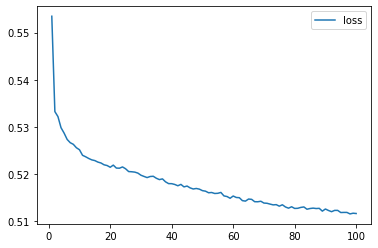

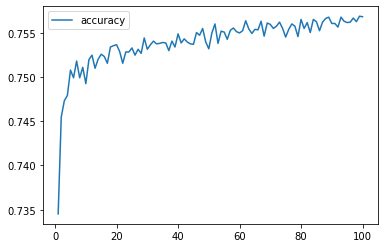

In [25]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")




In [26]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization3.h5")